In [1]:
import tensorflow as tf
import utils
import matplotlib.pyplot as plt
%matplotlib inline

print('TensorFlow Version:', tf.__version__)


TensorFlow Version: 1.15.0


<module 'matplotlib.pyplot' from 'C:\\Users\\Olya\\Anaconda3\\envs\\dwtcnn\\lib\\site-packages\\matplotlib\\pyplot.py'>

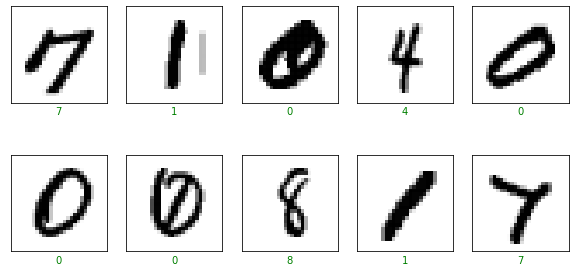

In [2]:
(x_train, y_train), (x_test, y_test) = utils.load_data()
utils.plot_random_examples(x_train, y_train)

In [3]:
class ParametricRelu(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(ParametricRelu, self).__init__(**kwargs)
    
    def build(self, input_shape):
        self.alpha = self.add_weight(
            name='alpha', shape=(1,),
            initializer='zeros',
            trainable=True
        )
        super(ParametricRelu, self).build(input_shape)
    
    def call(self, x):
        return tf.maximum(0., x) + self.alpha*tf.minimum(0.,x)

In [4]:
def create_model(use_prelu=True):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(64, input_shape=(784,)))
    if use_prelu:
        model.add(ParametricRelu())
    else:
        model.add(tf.keras.layers.ReLU())
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = create_model()
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
parametric_relu (ParametricR (None, 64)                1         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,891
Trainable params: 50,891
Non-trainable params: 0
_________________________________________________________________


In [5]:
print('Initial alpha:', model.layers[1].get_weights())
h = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=5
)

Initial alpha: [array([0.], dtype=float32)]
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 53us/sample - loss: 0.2837 - acc: 0.9207 - val_loss: 0.1420 - val_acc: 0.9563
Epoch 2/5
60000/60000 [==============================] - 3s 50us/sample - loss: 0.1198 - acc: 0.9645 - val_loss: 0.1056 - val_acc: 0.9686
Epoch 3/5
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0861 - acc: 0.9734 - val_loss: 0.0963 - val_acc: 0.9708
Epoch 4/5
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0654 - acc: 0.9797 - val_loss: 0.0954 - val_acc: 0.9714
Epoch 5/5
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0538 - acc: 0.9830 - val_loss: 0.0866 - val_acc: 0.9732


In [6]:
print('Initial alpha:', model.layers[1].get_weights())

Initial alpha: [array([-0.94026566], dtype=float32)]


KeyError: 'val_accuracy'

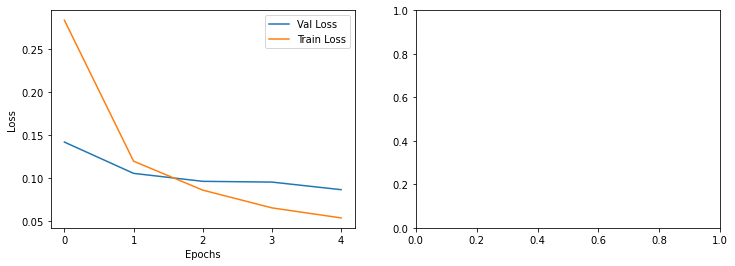

In [7]:
utils.plot_results(h).show()

In [ ]:
model = create_model(use_prelu=False)
model.summary()

In [ ]:
model = create_model(use_prelu=False)
model.summary()

In [ ]:
utils.plot_results(h).show()